In [6]:
# type: ignore , so it doesnt report missing import
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # disable info and warning messages
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
%matplotlib inline
print(tf.__version__)

2.13.1


Number of images: 1208
Mean: 100.33940397350993
Median: 83.0
Min: 49
Max: 514


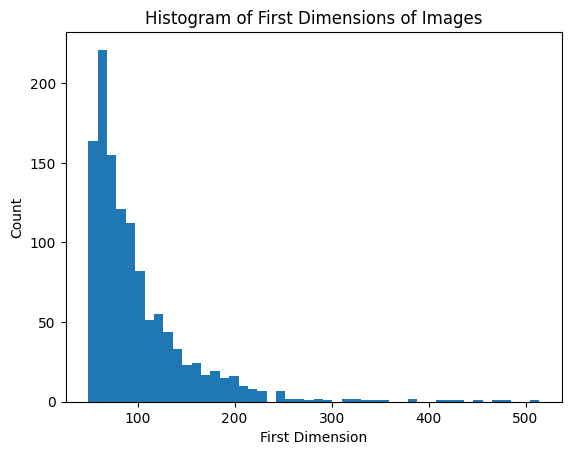

90.4980028928942

In [14]:
dirs = [
    "/home/helix/mldataset/cropped/ConfirmedFiles",
    "/home/helix/mldataset/cropped/RejectedFiles",
]
dimensions = []

for i in dirs:
    for j in os.listdir(i):
        
        imgs = os.path.join(i, j, "images")
        if not os.path.exists(imgs):
            continue
        for img in os.listdir(imgs):

            img = os.path.join(imgs, img)

            img = Image.open(img)
            img_array = np.array(img)
            dimensions.append(img_array.shape[0])
            img_array = np.expand_dims(img_array, axis=-1)

print("Number of images:", len(dimensions))
print("Mean:", np.mean(dimensions))
print("Geometric mean:",statistics.geometric_mean(dimensions))
print("Median:", np.median(dimensions))
print("Min:", np.min(dimensions))
print("Max:", np.max(dimensions))

plt.hist(dimensions, bins="auto")

plt.xlabel("First Dimension")
plt.ylabel("Count")
plt.title("Histogram of First Dimensions of Images")
plt.show()
import statistics


In [15]:
train_ds,val_ds = tf.keras.utils.image_dataset_from_directory(
    "/home/helix/mldataset/cropped",
    label_mode="binary",
    color_mode="grayscale",
    batch_size=32,
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=(90, 90),
)

Found 1208 files belonging to 2 classes.
Using 967 files for training.
Using 241 files for validation.


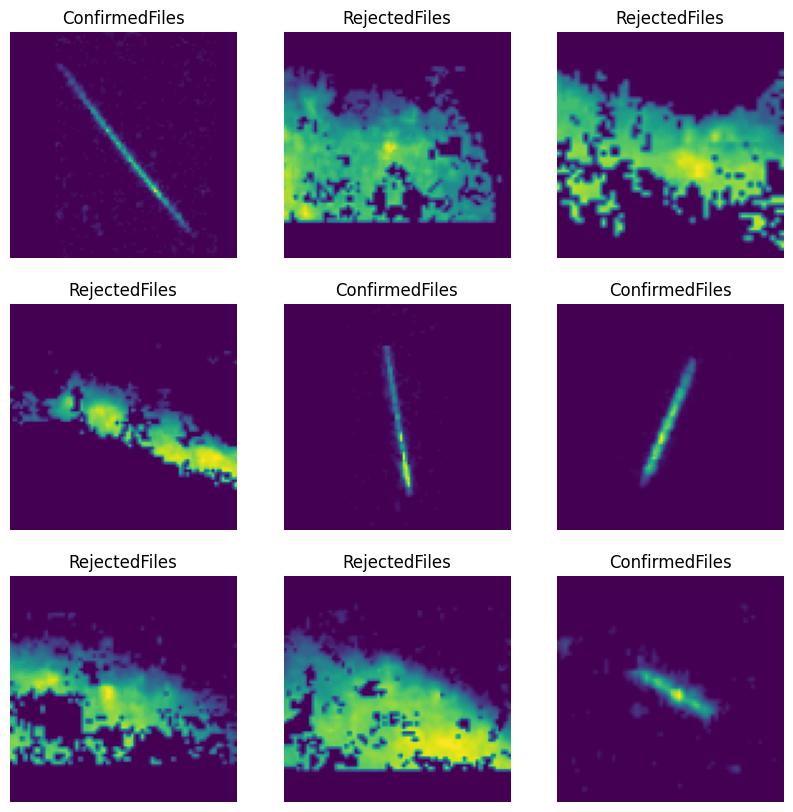

In [16]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[int(labels[i])])
    plt.axis("off")

In [13]:
dirs = [
    #"/home/helix/mldataset/cropped/ConfirmedFiles",
    "/home/helix/mldataset/cropped/RejectedFiles",
]
dimensions = []
ct=0
for i in dirs:
    for j in os.listdir(i):
        imgs = os.path.join(i, j, "images")

        ct+=len(os.listdir(imgs))
print(ct)

378
